<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-DL/blob/main/batch_norm_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/streamlit-random-forest-classifier/8e971d599f15b9920ef4631531eb7fc476efdab4/concertriccir2.csv')

In [ ]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


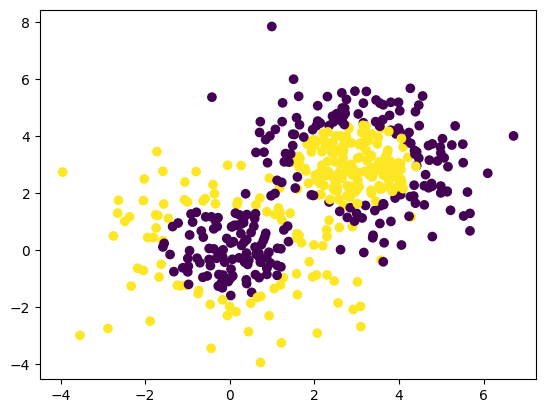

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [7]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history1 = model.fit(X,y,epochs=500,validation_split=0.2)

In [23]:
model1 = Sequential()

model1.add(Dense(8,activation='relu',input_dim=2))
model1.add(BatchNormalization())
model1.add(Dense(16,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(8,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 batch_normalization_2 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_4 (Batc  (None, 8)               

In [24]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history2 = model1.fit(X,y,epochs=400,validation_split=0.2, verbose = False)

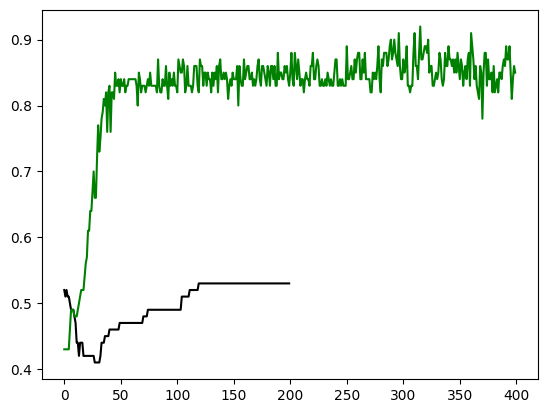

In [26]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

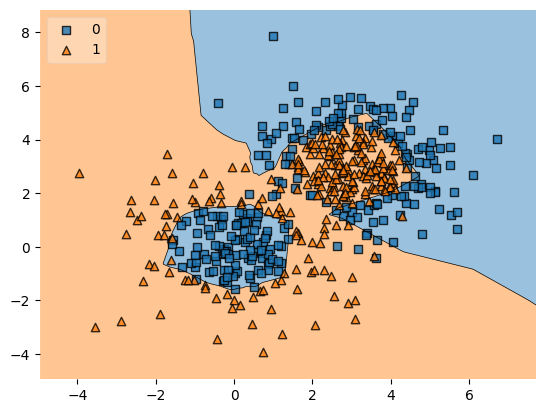

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf = model1, legend =2)

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

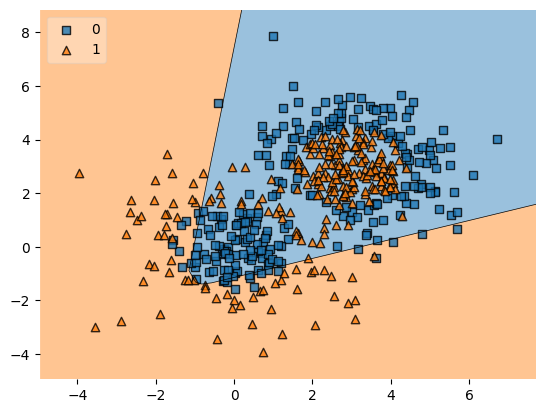

In [15]:
plot_decision_regions(X,y.astype('int'), clf = model, legend =2)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model2 = RandomForestClassifier(n_estimators = 500)
model2.fit(X, y)

RandomForestClassifier(n_estimators=500)

<Axes: >

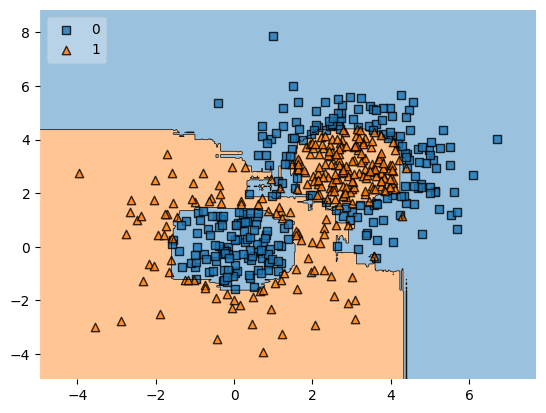

In [18]:
plot_decision_regions(X,y.astype('int'), clf = model2, legend =2)

In [20]:
!pip install catboost --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.1 MB/s eta 0:00:00


In [21]:
from catboost import CatBoostClassifier

<Axes: >

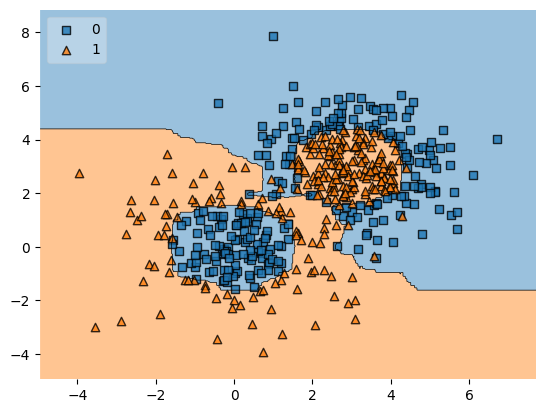

In [22]:
model3 = CatBoostClassifier(verbose = False)
model3.fit(X, y)
plot_decision_regions(X,y.astype('int'), clf = model3, legend =2)